In [1]:
import pymongo
import pandas as pd
import numpy as np

from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime

import matplotlib.pyplot as plt

from collections import defaultdict


%matplotlib inline
import json
plt.style.use('ggplot')

import seaborn as sns

from math import log10, floor

In [2]:
## Connect to local DB

client = MongoClient('localhost', 27017)
print ("Setup db access")

Setup db access


In [3]:
#
# Get collections from mongodb
#
#db = client.my_test_db
db = client.test


In [4]:
chunk = 100000
start = 0
end = start + chunk

In [5]:
#reponses = db.anon_student_task_responses.find({'correct':False})[start:end]
reponses = db.anon_student_task_responses.find()[start:end]

In [6]:
df_responses = pd.DataFrame(list(reponses))

In [7]:
print (df_responses.head())

                        _id               behavioral_traits  bonus  correct  \
0  5a00f1739100de1a390000d0                              []  False     True   
1  5a00f1739100de1a390000d5  [measuring_tools, orange_tick]  False     True   
2  5a00f1739100de1a390000d9                              []  False     True   
3  5a00f1739100de1a390000dc                              []  False     True   
4  5a00f1739100de1a390000df                              []  False     True   

       diff          id  incomplete         lesson  \
0  0.000000  nvrm82_9Yv       False       nline_1b   
1  0.563288  jVG3p9f-20       False       nline_1b   
2  0.601043  _NUUDSBMum       False  equivalence_0   
3  0.686276  B6HmMEMpoL       False  equivalence_0   
4  0.642014  IYWiIP26on       False  equivalence_0   

                                       level_summary  \
0  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
1  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
2  {'subject': 'fractions', 'uni

In [8]:
df_responses.shape

(100000, 27)

In [9]:
df2 = df_responses.join(pd.DataFrame(df_responses["student"].to_dict()).T)

In [10]:
df2 = df2.join(pd.DataFrame(df2['level_summary'].to_dict()).T)

In [11]:
df2 = df2.join(pd.DataFrame(df2['problems'].to_dict()).T)

In [12]:
df3  = df2.copy()

In [13]:
## Look act columns
print (df_responses.columns)

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched'],
      dtype='object')


In [14]:
## How many data samples
print (len(df_responses), "Number of entries")

100000 Number of entries


In [15]:
## Make 'description' a feature wih important words mapped

In [16]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong'],
      dtype='object')

In [17]:
df3['percent_prob_correct'] = df3['nright'].astype(float) / df3['ntotal']

In [18]:
df3.iloc[0]

_id                                              5a00f1739100de1a390000d0
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                                    0
id                                                             nvrm82_9Yv
incomplete                                                          False
lesson                                                           nline_1b
level_summary           {'entered': True, 'path': 'nline_1b', 'lm_stat...
problem_set             lessons/fractions/lesson13_1/part_a/media/prob...
problem_set_id                                                 _Pd6uU3viE
problem_set_subspace                                                parta
qual_id                                       _Pd6uU3viE.parta.nvrm82_9Yv
randomly_selected                     

In [19]:
for idx in range(100):
    print ('index"', idx)
    print (df3.iloc[idx]['lesson'])
    print (df3.iloc[idx]['response'])

index" 0
nline_1b
{'fraction_cblock_chains': [{'right': 442, 'sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}, 'pieces': ['1/2'], 'left': 97, 'lcm_sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}}], 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/start_marker.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/dog.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf'}], 'den': '2', 'fraction_input_value': '1/2', 'num': '1', 'fraction_cblock_total_count': 1, 'numberline_associations': [[]], 'fraction_cblock_counts': {'1/2': 1}, 'fraction_cblock_containment': {}, 'whole': ''}
index" 1
nline_1b
{'fraction_cblock_total_count': 4, 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/panda.swf'}, {'total': 1

In [20]:
def stringify_response(resp):
    my_val = str(resp).replace("': ","_")
    my_val = my_val.replace("_{"," ")
    my_val = my_val.replace("_[",", ")
    for c in [']','[','{','}',"'","",","]:
        my_val = my_val.replace(c,'')
    return my_val


In [21]:
stringify_response(df3.iloc[0]['response'])

'fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_'

In [22]:
df3['response_str'] = df3['response'].apply(stringify_response)

In [23]:
for idx in range(20):
    print (idx, df3['response_str'].iloc[idx])

0 fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_
1 fraction_cblock_total_count_4 plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/objects/panda.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf input_4 fraction_cblock_chains right_856 sum numerator_1 denominator_1 __as3_type_Fraction pieces 1/4 1/4 1/4 1/4 left_165 lcm_sum numerator_4 denomina

In [24]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong', 'percent_prob_correct',
       'response_str'],
      dtype='object')

In [25]:
## In Response:
### convert K, V, and all K_V into words in a text doc
### Then add text
### The add description


In [26]:
def make_string_from_list(key, elem_list):
    # Append key to each item in list
    ans = ''
    for elem in elem_list:
        ans += key + '_' + elem 
        
        

        
    

def make_string(elem, key=None, top=True):
    ans = ''
    if not elem:
        return ans
    if top:
        top = False
        top_keys = []
        for idx in range(len(elem.keys())):
            top_keys.append(True)
            
    for idx, key in enumerate(elem.keys()):
        if top_keys[idx]:
            top = True
            top_keys[idx] = False
            ans += ' '
        else:
            top = False
        #print ('ans = ', ans)
        #print (type(elem[key]))
        if type(elem[key]) is str or\
                type(elem[key]) is int:
            #print ('add value', elem[key])
            value = str(elem[key])
            #ans += key + '_' + value + ' ' + value + ' '
            ans += key + '_' + value + ' '
        elif type(elem[key]) is list:
            #print ('add list', elem[key])
            temp_elem = dict()
            for item in elem[key]:
                temp_elem[key] = item
                ans += make_string(temp_elem, top) 
        elif type(elem[key]) is dict:
            #print ('add dict', elem[key])
            for item_key in elem[key].keys():
                temp_elem = dict()
                temp_elem[item_key] = elem[key][item_key]
                ans += key + '_' + make_string(temp_elem, top)
        elif type(elem[key]) is float:
            #print ('add dict', elem[key])
            sig = 2
            value = elem[key]
            value = round(value, sig-int(
            floor(log10(abs(value))))-1)
            value = str(value)
            #ans += key + '_' + value + ' ' + value + ' '
            ans += key + '_' + value + ' '
        # ans += ' ' + key + ' '
        #print ('not handled', elem[key])
     
        
    return ans
        
            
        
            
            

In [27]:
df3['response_doc'] = df3['response'].map(make_string)

In [28]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x + ' ')

In [29]:
df3['response_doc'] = df3['response_doc'] + df3['txt'] 

In [30]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x + ' ')

In [31]:
df3['response_doc'] = df3['response_doc'] +  df3['description']

In [32]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("\n", ""))

In [33]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("?", " "))

In [34]:
df3.iloc[100]['response_doc']

" radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf plain_image_groups_ total_1  Do these shapes have 5/6 shaded Answer: [object Object] Students deepen their understanding of fractions by identifying area models that are divided into equal parts and those that aren't. "

In [35]:
df3.iloc[100]['response']

{'plain_image_groups': [{'total': 1,
   'url': 'assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf'},
  {'total': 1,
   'url': 'assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf'}],
 'radio_group_mc1': {'choice': 'B', 'text': 'No'},
 'radio_group_mc2': {'choice': 'A', 'text': 'Yes'}}

In [36]:
df3.iloc[100]

_id                                              5a00f1739100de1a390001fa
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                             0.304348
id                                                             Z3I2H8eOfO
incomplete                                                          False
lesson                                                      parts_whole_1
level_summary           {'subject': 'fractions', 'path': 'parts_whole_...
problem_set             lessons/fractions/lesson07/eq_parts/media/prob...
problem_set_id                                                 6nBHKepQ3Y
problem_set_subspace                                                 set2
qual_id                                        6nBHKepQ3Y.set2.Z3I2H8eOfO
randomly_selected                     

In [37]:
for idx in range(20):
    print (idx, df3['response_doc'].iloc[idx])

0   fraction_cblock_chains_ right_442 fraction_cblock_chains_ sum_ numerator_1 sum_ denominator_2 sum_ __as3_type_Fraction fraction_cblock_chains_  pieces_1/2 fraction_cblock_chains_ left_97 fraction_cblock_chains_ lcm_sum_ numerator_1 lcm_sum_ denominator_2 lcm_sum_ __as3_type_Fraction   plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/objects/dog.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf  den_2  fraction_input_value_1/2  num_1  fraction_cblock_total_count_1    fraction_cblock_counts_ 1/2_1   whole_  Use the 1/2 pieces to figure out how far the dog traveled.Answer: 1/2 In the first part of this lesson, student partitio

In [38]:
df3['response_doc'] = df3['response_doc'].map( lambda x: " ".join(x.split('/')) if '/' in x else x)

In [39]:
df3.iloc[100]['response_doc']

" radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_06.swf plain_image_groups_ total_1  Do these shapes have 5 6 shaded Answer: [object Object] Students deepen their understanding of fractions by identifying area models that are divided into equal parts and those that aren't. "

In [40]:
df3['response_doc'] = df3['response_doc'].map( lambda x: x.replace('[',' '))
df3['response_doc'] = df3['response_doc'].map( lambda x: x.replace(']',' '))

In [41]:
df3.iloc[100]['response_doc']

" radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_06.swf plain_image_groups_ total_1  Do these shapes have 5 6 shaded Answer:  object Object  Students deepen their understanding of fractions by identifying area models that are divided into equal parts and those that aren't. "

In [42]:
docs = list(df3['response_doc'])

In [43]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [44]:
data_samples = docs

In [45]:
n_features = 1000
n_samples = len(data_samples)
n_topics = 50
n_top_words = 20

In [46]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extracting tf features for LDA...
done in 10.930s.


In [428]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf-idf features for NMF...
done in 10.677s.
Extracting tf features for LDA...
done in 9.809s.


In [429]:

from sklearn.cluster import KMeans, MiniBatchKMeans
true_k = 100

km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, random_state=100)

In [430]:
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(tf)
print("done in %0.3fs" % (time() - t0))
print()

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10,
        n_clusters=100, n_init=1, random_state=100,
        reassignment_ratio=0.01, tol=0.0, verbose=0)
done in 1.971s



In [431]:
print("Top terms per cluster:")


order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tf_vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: fraction_circle_groups_ students pieces_1 fraction pieces names lesson unit given relative fraction_circle_counts_ piece scale_1 y_350 circle object answer cover half fourth naming say different need goal limited depending flexible second important
Cluster 1: fraction_cblock_chains_ lcm_sum_ sum_ pieces_1 __as3_type_fraction numerator_1 12 denominator_12 denominator_1 fraction_cblock_counts_ fraction denominator_3 denominator_4 denominator_6 fraction_cblock_containment_ unit1_ bar1_ denominator_2 left_100 fractions bar2_ answer numerator_2 denominator_8 numerator_3 left_175 students numerator_4 using left_90
Cluster 2: fraction_cblock_chains_ lcm_sum_ sum_ __as3_type_fraction numerator_1 pieces_1 denominator_12 denominator_8 12 denominator_1 fraction_cblock_counts_ left_175 denominator_4 denominator_6 right_865 fractions fraction left_347 right_347 numerator_5 unit3_ answer right_519 review left_520 ordering using fraction_cblock_containment_ numerator

In [432]:
len(km.labels_)

100000

In [433]:
np.bincount(km.labels_)

array([ 2268,   251,   810,   429,   597,  4853,    84,    74,  1170,
        1149,   716,   828,   939,   294,  1035,   423,   358,   399,
         369,  1950,   704,  2464,   286,    13,   155,  1255, 15211,
         896,   754,   612,  1617,   736,    22,   451,  1054,   582,
        1083,   375,   451,   646,   322,  3041,  1011,   490,   253,
         171,   384,   276,   221,    49,   313,   177,   503,  1833,
         877,  1229,   254,   248,   269,   846,   647,  1763,   440,
        1559,  7521,   540,   269,   459,  3511,   793,    86,   301,
         233,  1671,  2721,   961,   999,   314,   583,   112,    51,
          92,   477,  1071,   117,   731,  1080,   110,   696,   214,
        1027,   937,    18,  2722,   148,  1418,   700,   302,   985,   491])

In [434]:
df3['cluster_100'] = km.labels_

In [435]:
len(np.bincount(km.labels_))

100

In [436]:
df3.shape

(100000, 63)

In [437]:
df3['cluster_100'] = km.labels_


In [438]:
df3['trait_1'] = df3['behavioral_traits'].apply(lambda x : x[0] if len(x) > 0 else 'None' )

In [439]:
df3['trait_2'] = df3['behavioral_traits'].apply(lambda x : x[1] if len(x) > 1 else 'None' ) 

In [440]:
df3['trait_1'].value_counts()

None                             71238
how_to_model                      5348
inverts_numerator_denominator     4638
identifying_gt_lt                 2806
deci_understanding_gt_lt          1425
recognizing_the_whole             1307
deci_incorrect_inequality         1282
starting_from_0_nline             1047
dragging_to_add                    956
counting_hops_not_ticks            892
inequality_symbol                  788
partially_drawn_parts              680
modeled_incorrect_comparison       673
comparing_frac_gt_lt               542
misplaced_fraction_part_nline      480
measuring_tools                    459
deci_placing_decimal_points        408
partitioning_number_line           398
nline_as_whole                     325
deci_tens_vs_tenths                317
simplifying_mixed_numbers          292
simplify_with_common_denom         289
simplifying_bars_2                 280
deci_hops_instead_ticks            274
deci_forgot_decimal_point          274
deci_hundredths_vs_tenths

In [441]:
df3['trait_2'].value_counts()

None                            95784
simplifying_mixed_numbers         835
equally_sized_parts               680
modeled_incorrect_numerator       673
orange_tick                       459
simplifying_answers_nline         421
wrong_number_parts                398
dragging_to_add_3_circles         292
deci_break_tenths_hundredths      236
nline_restart_one                 214
modulo_ans                          8
Name: trait_2, dtype: int64

In [442]:
df_cluster_100 = df3.groupby('cluster_100')

In [443]:
len(df_cluster_100)

100

In [444]:
#df_cluster_100.head()

In [445]:
df_pcorrect = df3['percent_prob_correct'].groupby(df3['cluster_100']).describe()

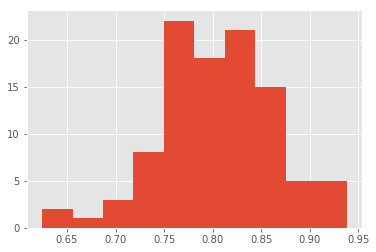

In [446]:
df_pcorrect['mean'].hist()

In [447]:
df_correct = df3['correct'].groupby(df3['cluster_100']).mean()

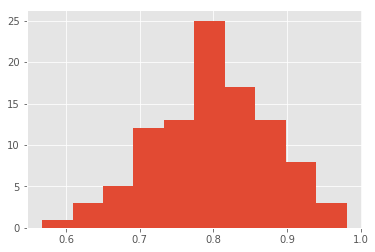

In [448]:
df_correct.hist()

In [449]:
df_true = df3[df3['correct']==True]
df_correctx_true = df_true['percent_prob_correct']

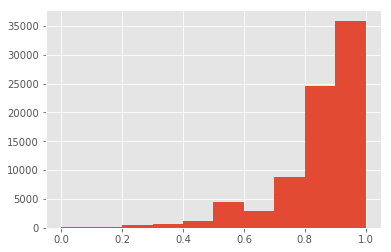

In [450]:
df_correctx_true.hist()

In [451]:
df_false = df3[df3['correct']!=True]
df_correctx_false = df_false['percent_prob_correct']

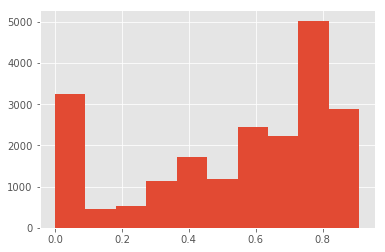

In [452]:
df_correctx_false.hist()

In [453]:
df_trait_1 = df3.groupby(['cluster_100', 'trait_1']).size().unstack(fill_value=0)

In [454]:
df_trait_2 = df3.groupby(['cluster_100', 'trait_2']).size().unstack(fill_value=0)

In [455]:
df_trait_2

trait_2,None,deci_break_tenths_hundredths,dragging_to_add_3_circles,equally_sized_parts,modeled_incorrect_numerator,modulo_ans,nline_restart_one,orange_tick,simplifying_answers_nline,simplifying_mixed_numbers,wrong_number_parts
cluster_100,,,,,,,,,,,
0,2268,0,0,0,0,0,0,0,0,0,0
1,250,0,0,0,1,0,0,0,0,0,0
2,780,0,0,0,28,0,1,1,0,0,0
3,429,0,0,0,0,0,0,0,0,0,0
4,597,0,0,0,0,0,0,0,0,0,0
5,4846,0,0,0,7,0,0,0,0,0,0
6,74,0,0,0,10,0,0,0,0,0,0
7,74,0,0,0,0,0,0,0,0,0,0
8,1170,0,0,0,0,0,0,0,0,0,0


In [456]:
#df_trait_2.columns

In [457]:
#df_trait_1.columns

In [458]:
#[x for x in df_trait_2.columns if x not in df_trait_1.columns ]

In [459]:
#[x for x in df_trait_1.columns if x not in df_trait_2.columns ]

In [460]:
#df_trait_1 = df_trait_1.drop('None', axis=1)
#df_trait_2 = df_trait_2.drop('None', axis=1)

In [461]:
df_traits = pd.merge(left=df_trait_1,right=df_trait_2, how='left' )


In [462]:
df_trait_1.index.rename('cluster_100', inplace=True)

In [463]:
df_trait_2.index.rename('cluster_100', inplace=True)

In [464]:
df_traits.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [465]:
df_traits = pd.concat([df_trait_1, df_trait_2], axis=1)

In [466]:
print (df_traits.shape)
print (df_trait_1.shape)
print (df_trait_2.shape)


(100, 62)
(100, 51)
(100, 11)


In [467]:
#df_traits.columns

In [468]:
df_traits = df_traits.groupby(df_traits.columns, axis=1).sum()

In [469]:
#df_traits

In [470]:
df_traits = df_traits.drop('None', axis=1)

In [471]:
#df_traits

In [472]:
import seaborn as sns

In [473]:
df_traits_dict = df_traits.to_dict()

In [474]:
df_traits_dict_cluster = df_traits.transpose().to_dict()

In [475]:
df_traits_dict_cluster_no0 = {}
for cluster, trait_dict in df_traits_dict_cluster.items():
    # print (cluster, trait_dict)
    df_traits_dict_cluster_no0[cluster] = { k:v for k,v in trait_dict.items() if v != 0}

In [476]:
df_traits_dict_cluster_no0[88]

{'deci_compare_no_models': 1,
 'how_to_model': 502,
 'recognizing_the_whole': 3,
 'simplifying_mixed_numbers_2': 2}

In [477]:
df_traits_dict_cluster_no0[38]

{'deci_placing_decimal_points': 405}

In [478]:
print (sorted(list(df_traits.columns)))

['area_model', 'benchmark_1_2', 'benchmark_quarters', 'comparing_frac_gt_lt', 'counting_hops_for_division', 'counting_hops_not_ticks', 'deci_add_to_model', 'deci_break_tenths_hundredths', 'deci_building_tenths', 'deci_compare_no_models', 'deci_forgot_decimal_point', 'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths', 'deci_incorrect_inequality', 'deci_placing_decimal_points', 'deci_point_location_correct', 'deci_tens_vs_tenths', 'deci_understanding_gt_lt', 'determine_the_frac_part', 'dragging_to_add', 'dragging_to_add_3_circles', 'equally_sized_parts', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model', 'identifying_gt_lt', 'inequality_symbol', 'inverts_numerator_denominator', 'measuring_tools', 'misplaced_fraction_part_nline', 'mixed_number_quotient', 'mixed_numbers_on_number_line', 'modeled_incorrect_comparison', 'modeled_incorrect_numerator', 'modeling_fraction_division', 'modulo_ans', 'multiplication', 'multiplying_whole_by_proper', 'nline_as_whole', 'nline_restart_one', 'numer

In [479]:
temp = (sorted(list(df_traits.columns)))
for idx, x in enumerate(temp):
    if idx > 0:
        if x == temp[idx - 1]:
            print (x)

In [480]:
#df_traits_norm = (df_traits - df_traits.mean()) / (df_traits.max() - df_traits.min())
df_traits_norm = (df_traits  / (df_traits.sum()) )

In [481]:
df_traits_norm = df_traits_norm.applymap( lambda x: 0 if x < 0 else x)

In [482]:
#df_traits_norm

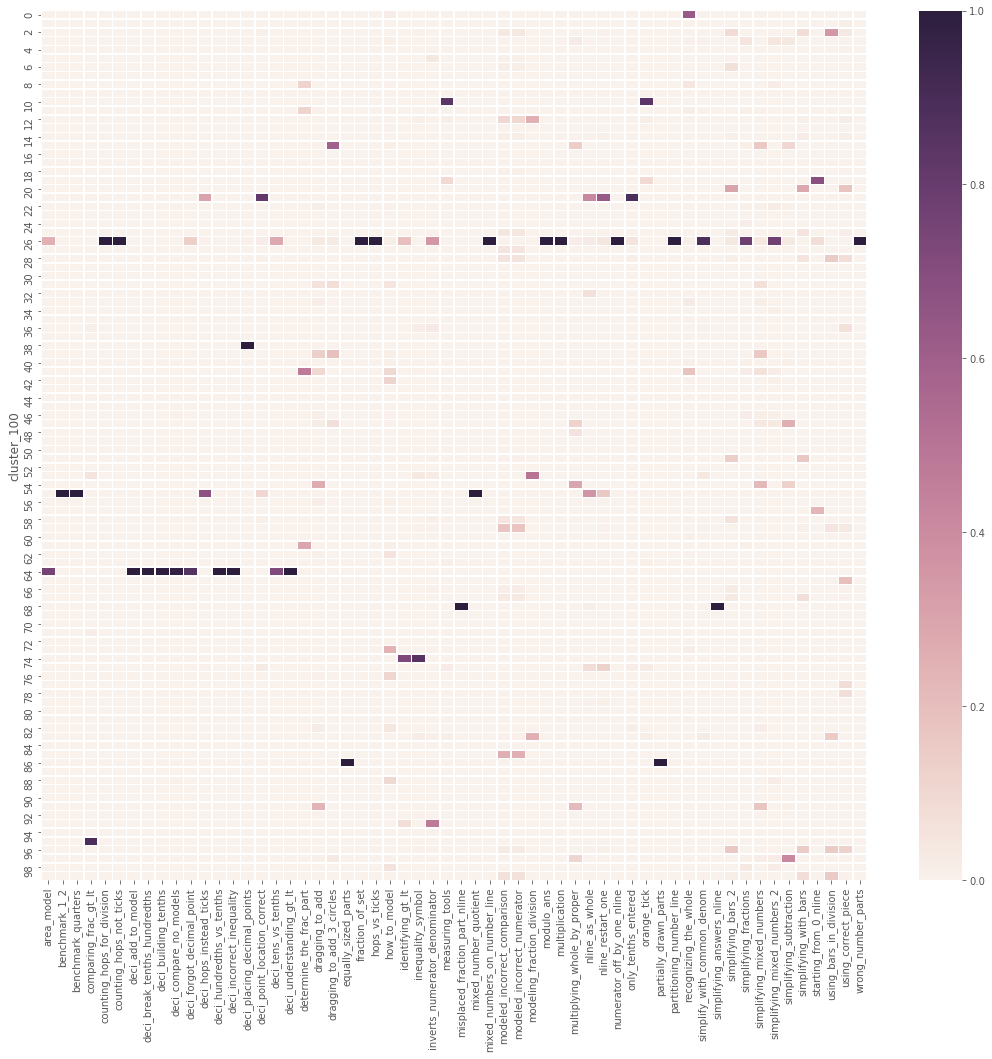

In [483]:
fig = plt.figure(figsize=(18.5, 16))
cmap = sns.cubehelix_palette(light=.95, as_cmap=True)
sns.heatmap(df_traits_norm, cmap=cmap,  linewidths=.5)

#sns.heatmap(df_traits_norm, cmap="YlGnBu",  linewidths=.5)

In [484]:
df_traits_norm.shape

(100, 58)

In [485]:
fig.savefig('heat_map_100.png')


In [486]:

#df_traits.plot.bar(stacked=True, figsize=(18.5, 16), legend=False)

In [487]:
df_traits.to_csv('cluster_100.csv')

In [488]:
df_traits2 = pd.concat([df3['percent_prob_correct'].groupby(df3['cluster_100']).describe(), df_traits], axis=1)

In [489]:
df_traits2.to_csv('cluster_100_plus_correct.csv')

In [490]:
df_traits_dict = df_traits.to_dict(orient='dict')

In [491]:
df_traits_dict

{'area_model': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 0,
  21: 0,
  22: 0,
  23: 0,
  24: 0,
  25: 0,
  26: 4,
  27: 0,
  28: 0,
  29: 0,
  30: 0,
  31: 0,
  32: 0,
  33: 0,
  34: 0,
  35: 0,
  36: 0,
  37: 0,
  38: 0,
  39: 0,
  40: 0,
  41: 0,
  42: 0,
  43: 0,
  44: 0,
  45: 0,
  46: 0,
  47: 0,
  48: 0,
  49: 0,
  50: 0,
  51: 0,
  52: 0,
  53: 0,
  54: 0,
  55: 0,
  56: 0,
  57: 0,
  58: 0,
  59: 0,
  60: 0,
  61: 0,
  62: 0,
  63: 0,
  64: 12,
  65: 0,
  66: 0,
  67: 0,
  68: 0,
  69: 0,
  70: 0,
  71: 0,
  72: 0,
  73: 0,
  74: 0,
  75: 0,
  76: 0,
  77: 0,
  78: 0,
  79: 0,
  80: 0,
  81: 0,
  82: 0,
  83: 0,
  84: 0,
  85: 0,
  86: 0,
  87: 0,
  88: 0,
  89: 0,
  90: 0,
  91: 0,
  92: 0,
  93: 0,
  94: 0,
  95: 0,
  96: 0,
  97: 0,
  98: 0,
  99: 0},
 'benchmark_1_2': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 

In [492]:
df_traits_dict2 = {}
cluster_with_no_trait = list(np.arange(100))
cluster_with_lt_10_trait = list(np.arange(100))

In [493]:
for trait in df_traits_dict:
    #print (idx, trait)
    df_traits_dict2[trait] = {}
    for cluster in df_traits_dict[trait]:
        #print (trait, cluster, df_traits_dict[trait][cluster])
        if  df_traits_dict[trait][cluster] > 0:
            df_traits_dict2[trait][cluster] = df_traits_dict[trait][cluster]
            if cluster in cluster_with_no_trait:
                cluster_with_no_trait.remove(cluster)
            if  df_traits_dict[trait][cluster] > 9:
                if cluster in cluster_with_lt_10_trait:
                    cluster_with_lt_10_trait.remove(cluster)

In [494]:
print (df_traits_dict2)

{'area_model': {26: 4, 64: 12}, 'benchmark_1_2': {55: 8}, 'benchmark_quarters': {55: 66}, 'comparing_frac_gt_lt': {28: 2, 36: 8, 43: 1, 53: 28, 63: 2, 71: 11, 76: 2, 82: 1, 83: 2, 84: 1, 95: 482, 96: 2}, 'counting_hops_for_division': {26: 36}, 'counting_hops_not_ticks': {26: 892}, 'deci_add_to_model': {64: 113}, 'deci_break_tenths_hundredths': {64: 255}, 'deci_building_tenths': {64: 46}, 'deci_compare_no_models': {22: 1, 46: 1, 64: 156, 88: 1}, 'deci_forgot_decimal_point': {26: 38, 64: 236}, 'deci_hops_instead_ticks': {2: 1, 21: 84, 25: 1, 26: 2, 55: 184, 75: 2}, 'deci_hundredths_vs_tenths': {64: 244}, 'deci_incorrect_inequality': {64: 1282}, 'deci_placing_decimal_points': {26: 3, 38: 405}, 'deci_point_location_correct': {2: 1, 21: 86, 26: 2, 28: 1, 55: 11, 58: 1, 75: 3}, 'deci_tens_vs_tenths': {26: 90, 64: 227}, 'deci_understanding_gt_lt': {64: 1425}, 'determine_the_frac_part': {8: 2, 11: 2, 41: 8, 61: 5}, 'dragging_to_add': {11: 6, 13: 1, 15: 5, 22: 12, 24: 1, 26: 32, 31: 55, 33: 15,

In [495]:
cluster_with_no_trait, 

([9, 29, 30, 37, 44, 45, 50, 52, 69, 70, 72, 81, 87, 89, 94],)

In [496]:
len(cluster_with_no_trait)

15

In [497]:
len(cluster_with_lt_10_trait)

33

In [498]:
x = list(df_traits.index)

In [499]:
df_traits.shape

(100, 58)

In [500]:
y = df_traits.sum(axis=1)

In [501]:
y

cluster_100
0      922
1        9
2      134
3       84
4       11
5      194
6       43
7        1
8      102
9        0
10     768
11      62
12     176
13      39
14      42
15     463
16       4
17       3
18      13
19     809
20     172
21     554
22      71
23       1
24      10
25     109
26    5431
27      68
28     130
29       0
      ... 
70       0
71      47
72       0
73    1325
74    2705
75      86
76     580
77      13
78      12
79       4
80       4
81       0
82     285
83      94
84       1
85     348
86    1358
87       0
88     508
89       0
90       2
91     461
92      12
93    2414
94       0
95     482
96     177
97     172
98     323
99     134
Length: 100, dtype: int64

In [502]:

#plt.bar( x, y)


In [503]:
#fig, ax = plt.subplots()

#rects1 = ax.bar(x, y, color='b')
#ax.set_xlabel('Cluster number')
#ax.set_ylabel('Responses with trait at this cluster')
#ax.set_title('Traits per cluster')



In [504]:
counts_per_cluster = np.bincount(km.labels_)

In [505]:
print (counts_per_cluster)

[ 2268   251   810   429   597  4853    84    74  1170  1149   716   828
   939   294  1035   423   358   399   369  1950   704  2464   286    13
   155  1255 15211   896   754   612  1617   736    22   451  1054   582
  1083   375   451   646   322  3041  1011   490   253   171   384   276
   221    49   313   177   503  1833   877  1229   254   248   269   846
   647  1763   440  1559  7521   540   269   459  3511   793    86   301
   233  1671  2721   961   999   314   583   112    51    92   477  1071
   117   731  1080   110   696   214  1027   937    18  2722   148  1418
   700   302   985   491]


In [506]:
counts_per_cluster = list(counts_per_cluster)

In [507]:
counts_per_cluster = [x for x in counts_per_cluster if x != 0]

In [508]:
counts_per_cluster = np.array(counts_per_cluster)

In [509]:
y1 = y / counts_per_cluster

In [510]:
# y

In [511]:
#fig, ax = plt.subplots()

#rects1 = ax.bar(x, y1, color='b')
#ax.set_xlabel('Cluster number')
#ax.set_ylabel('Responses with trait at this cluster/ total response at cluster')
#ax.set_title('Traits per cluster')

In [512]:
df_traits2p = df_traits2.copy()

In [513]:
df_traits2p['num_correct_true'] = df3.groupby('cluster_100')['correct'].apply(lambda x: (x==True).sum())

In [514]:
df_traits2p['percent_correct_true'] = (df_traits2p['num_correct_true']/df_traits2p['count'])*100.0

In [515]:
df_traits2p.drop('num_correct_true', axis=1, inplace=True)

In [516]:
#df_traits2p

In [517]:
#df_traits2

In [518]:
df_percent_prob_correct = df_traits2['mean']

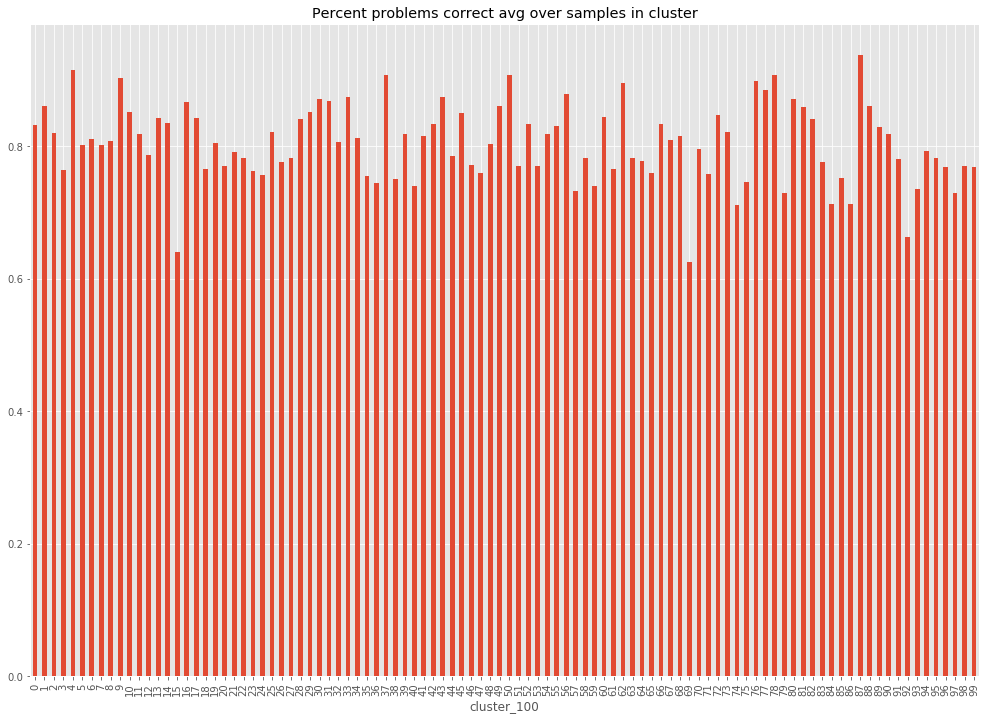

In [519]:
df_percent_prob_correct.plot.bar(figsize=(17,12), title='Percent problems correct avg over samples in cluster')

In [520]:
df_percent_correct_true = df_traits2p['percent_correct_true']

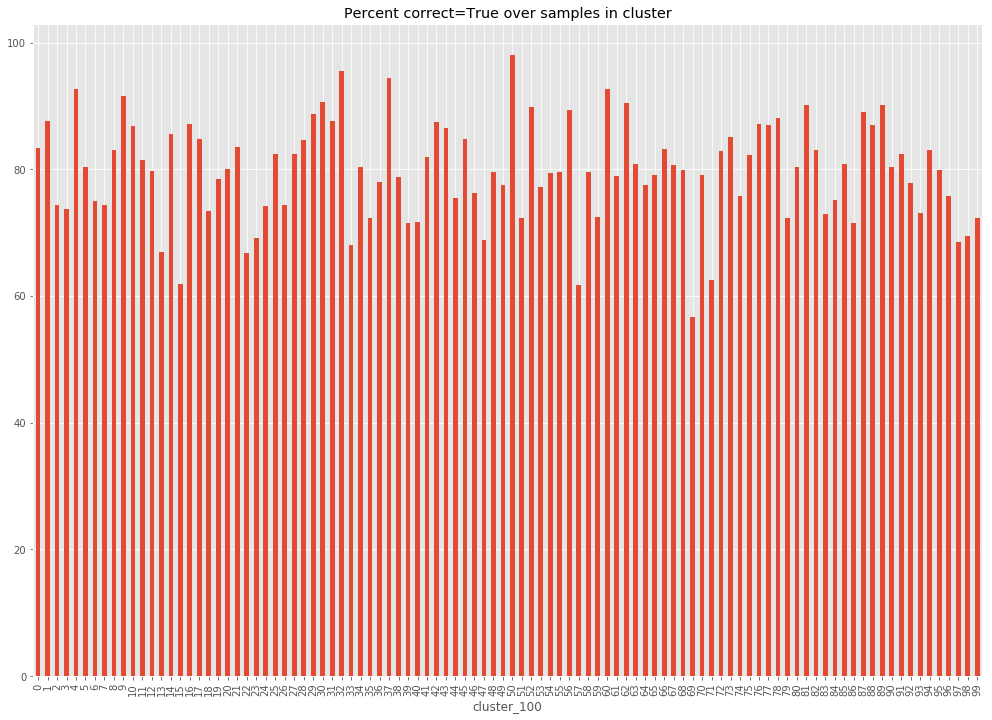

In [521]:
df_percent_correct_true.plot.bar(figsize=(17,12), title='Percent correct=True over samples in cluster')

In [522]:
df_sample_size = df_traits2p['count']

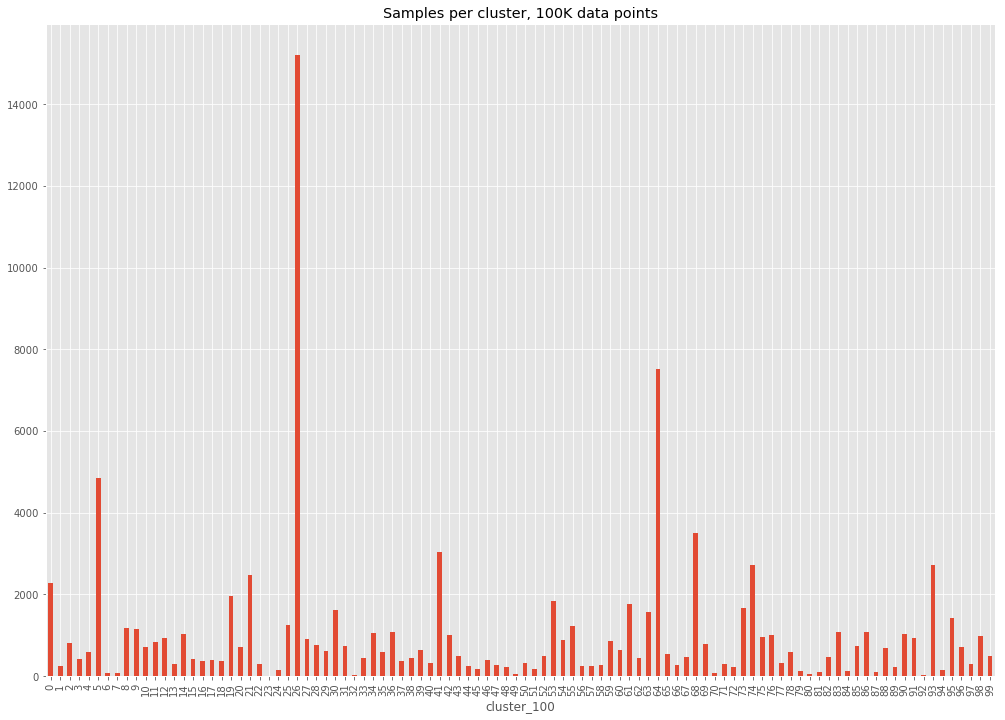

In [523]:
df_sample_size.plot.bar(figsize=(17,12), title='Samples per cluster, 100K data points')

In [524]:
df_trait_dict = df_traits.transpose().to_dict()

In [525]:
df_trait_dict_new = defaultdict()
for cluster in df_trait_dict:
    # print (cluster,df_trait_dict[cluster])
    df_trait_dict_new[cluster] = defaultdict()
    for trait in df_trait_dict[cluster]:
        # print (trait, df_trait_dict[cluster][trait])
        if df_trait_dict[cluster][trait] != 0:
            df_trait_dict_new[cluster][trait] = df_trait_dict[cluster][trait]
        

In [526]:
#df_trait_dict_new

In [527]:
sums = df_traits.sum()

In [528]:
df_traits_pct = df_traits/sums * 100.0

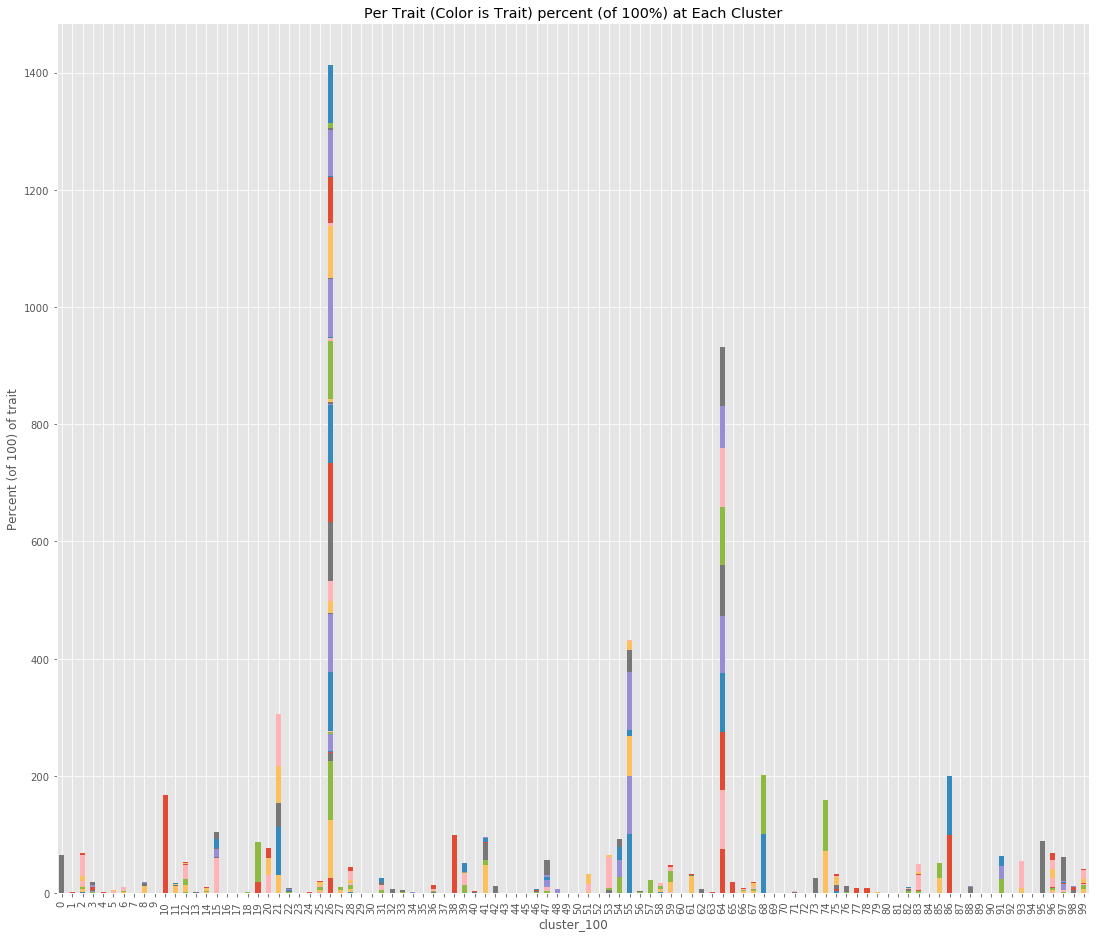

In [529]:
ax = df_traits_pct.plot.bar(stacked=True, figsize=(18.5, 16), legend=False, title='Per Trait (Color is Trait) percent (of 100%) at Each Cluster')
ax.set_ylabel("Percent (of 100) of trait")

In [530]:
df_traits_pct_dict = df_traits_pct.transpose().to_dict()

In [531]:
df_traits_pct_dict_new = defaultdict()

In [532]:
for cluster in df_traits_pct_dict:
    #print (cluster,df_traits_pct_dict[cluster])
    df_traits_pct_dict_new[cluster] = defaultdict()
    for trait in df_traits_pct_dict[cluster]:
        # print (trait, df_traits_pct_dict[cluster][trait])
        if df_traits_pct_dict[cluster][trait] > 5:
            df_traits_pct_dict_new[cluster][trait] = df_traits_pct_dict[cluster][trait]
        

In [535]:
for key in df_traits_pct_dict_new:
    print ("Cluster {0} -- count of samples in this cluster {1}".format(key, df_traits2.iloc[key]['count']))
    if len(df_traits_pct_dict_new[key]) < 1:
        print ("None")
    else:
        for trait in df_traits_pct_dict_new[key]:
            print (' -- ' + str(trait) + ' : '  + "{0:.1f}".format(df_traits_pct_dict_new[key][trait]))

Cluster 0 -- count of samples in this cluster 2268.0
 -- recognizing_the_whole : 62.6
Cluster 1 -- count of samples in this cluster 251.0
None
Cluster 2 -- count of samples in this cluster 810.0
 -- simplifying_bars_2 : 8.9
 -- simplifying_with_bars : 8.6
 -- using_bars_in_division : 35.0
Cluster 3 -- count of samples in this cluster 429.0
None
Cluster 4 -- count of samples in this cluster 597.0
None
Cluster 5 -- count of samples in this cluster 4853.0
None
Cluster 6 -- count of samples in this cluster 84.0
 -- simplifying_bars_2 : 6.8
Cluster 7 -- count of samples in this cluster 74.0
None
Cluster 8 -- count of samples in this cluster 1170.0
 -- determine_the_frac_part : 11.8
Cluster 9 -- count of samples in this cluster 1149.0
None
Cluster 10 -- count of samples in this cluster 716.0
 -- measuring_tools : 83.7
 -- orange_tick : 83.7
Cluster 11 -- count of samples in this cluster 828.0
 -- determine_the_frac_part : 11.8
Cluster 12 -- count of samples in this cluster 939.0
 -- modeled_